The IRIS flower dataset is a multivariate dataset introduced by British statistician Ronald Fisher in 1936. It contains measurements of 150 iris flowers from three different species, with 50 samples from each species. The dataset has become a classic benchmark for testing classification algorithms and is widely used in pattern recognition literature.
XgBoost Classifier model has been used to train the dataset.

In [6]:
import pandas as pd
import numpy as np
!pip install ydata-profiling


In [7]:
df=pd.read_csv('/content/IRIS.csv')
df.head(31)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
#handling null values
df.isnull().sum()


,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [11]:
#performing ydata profiling
from ydata_profiling import ProfileReport
profile=ProfileReport(df,title='profile report',explorative=True)
display(profile)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 5/5 [00:00<00:00, 240.49it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
#handle duplicates
df.duplicated().sum()


np.int64(3)

In [16]:
#label encoding categorical columns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['species']=le.fit_transform(df['species'])
df.head(31)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [17]:
#split dataset into dependent and independent variable
x=df.drop('species',axis=1)
y=df['species']

In [18]:
#split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [19]:
#train an xgboost model
from xgboost import XGBClassifier
model=XGBClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [24]:
#evaluate models performance
from sklearn.metrics import accuracy_score,classification_report
print("Accuracy Score:",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy Score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



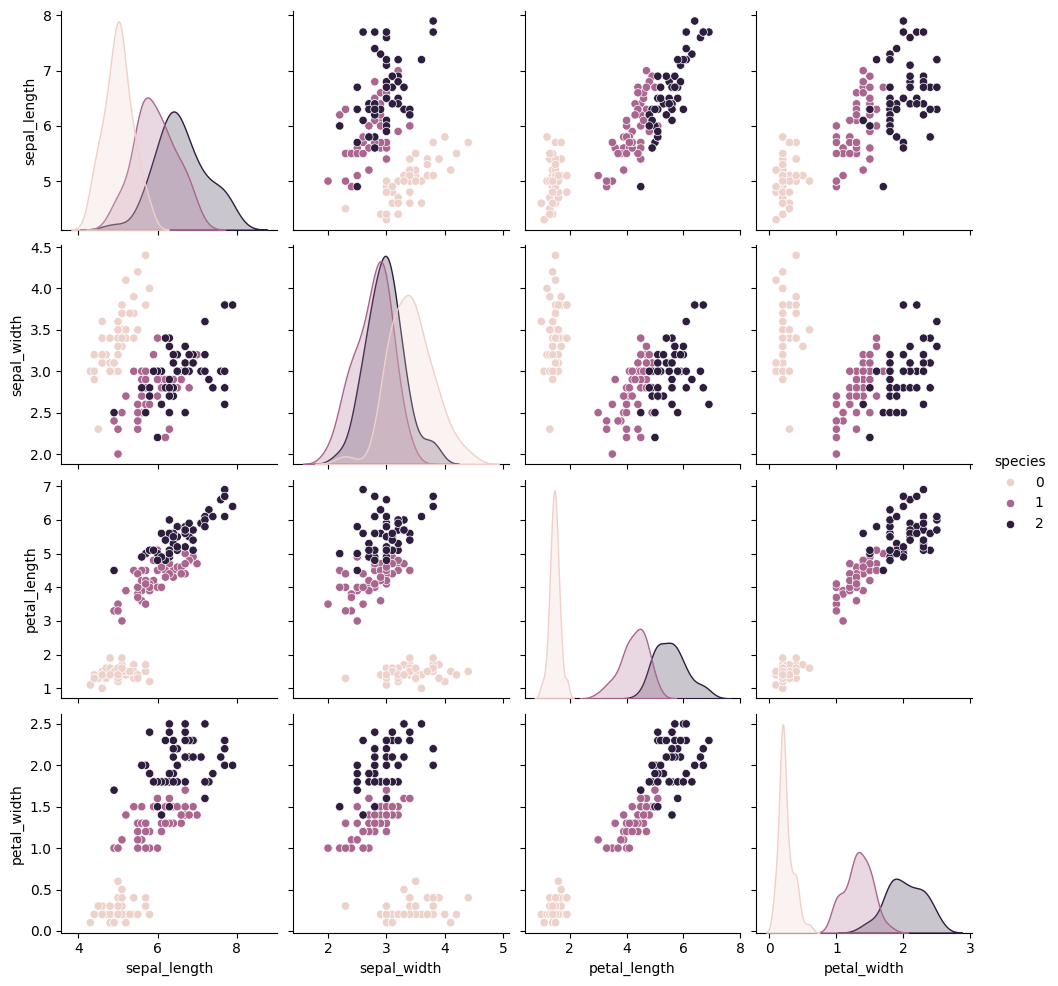

In [25]:
#plot visualisations of how species correlates with the other featuress
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df,hue='species')
plt.show()

## Insights on Dataset and Model Performance

Based on the analysis performed so far, here are some insights about the dataset and the model's performance:

**Dataset Insights:**

*   The dataset contains 150 samples of Iris flowers with measurements for sepal length, sepal width, petal length, and petal width, along with their species.
*   There are no missing values in the dataset.
*   There are 3 duplicate rows in the dataset. These duplicates could be removed to ensure the model is not trained on redundant information.
*   The `species` column has been successfully label encoded for model training.
*   The pairplot visualization shows clear separation between the 'Iris-setosa' species and the other two species ('Iris-versicolor' and 'Iris-virginica') based on petal length and petal width. There is some overlap between 'Iris-versicolor' and 'Iris-virginica', particularly in sepal length and sepal width. This suggests that petal measurements are more discriminative for classifying Iris species.

**Model Performance Insights:**

*   The XGBoost model achieved an accuracy score of 1.0 on the test set.
*   The classification report shows perfect precision, recall, and f1-score for all three species on the test set.

**Interpretation:**

The model performed exceptionally well on the test set, achieving 100% accuracy. This could indicate that the dataset is relatively easy to classify with these features, or it might suggest potential data leakage or overfitting if the test set is not representative of real-world data. Further evaluation with cross-validation or on a separate, unseen dataset would provide a more robust assessment of the model's generalization capabilities.